<a href="https://colab.research.google.com/github/MartaAmoresCastillejo/Lab1/blob/main/Lab1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EJERCICIO 3


El objetivo de la siguiente práctica es realizar un análisis de componentes principales. Este análisis es sirve estudiar las relaciones que se presentan entre x variables correlacionadas, y ese es nuestro objetivo principal.

## Apartado 1

Cargamos los datos y realizamos lo necesario para trabajar con ellos.


Debemos de estandarizar los datos para que las diferencias de rango 
no supongan un problema a la hora de procesar la información. 
Para estandarizar los datos se necesita calcular la matriz de correlaciones. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
data = pd.read_csv('pokemon.csv', encoding = 'latin_1')
data.head()

,PokÃ©mon,Tipo,PS,Ataque,Defensa,Ataque especial,Defensa especial,Velocidad
0,TYPHLOSION,Fuego,2,3,2,4,2,4
1,PONYTA,Fuego,2,3,2,2,2,3
2,TORKOAL,Fuego,2,3,4,3,2,1
3,ARCANINE,Fuego,3,5,3,4,3,4
4,STARMIE,Agua,2,3,3,4,2,4


Comprobamos que no tenemos datos nulos ni incompletos en nuestro set de datos.

In [3]:
data.isna().any().any()

False

También vamos a identificar que nuestro set de datos no tenga datos anómalos, raro u outliers. Con la función describe podemos ver el análisis de los datos.

In [4]:
data.describe()

,PS,Ataque,Defensa,Ataque especial,Defensa especial,Velocidad
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,2.250000,2.950000,2.600000,3.350000,2.400000,2.850000
std,0.786398,0.944513,0.820783,1.182103,0.820783,1.136708
min,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,2.000000,3.000000,2.500000,3.500000,2.000000,3.000000
75%,3.000000,3.250000,3.000000,4.000000,3.000000,4.000000
max,4.000000,5.000000,4.000000,5.000000,4.000000,5.000000


No observamos datos raros, así que pasamos a realizar nuestro objetivo.

Importamos la librería necesaria para estandarizarlos.

In [5]:
from sklearn.preprocessing import StandardScaler

Debemos de estandarizar el tipo de variable que nos interesa, en este caso, vamos a estandarizar las columnas: PS, Ataque, Defensa, Ataque especial, Defensa especial y Velocidad. 
La estandarización se realiza para que los datos contribuyan por igual al análisis. 

In [6]:
columnas = ['PS', 'Ataque', 'Defensa', 'Ataque especial', 'Defensa especial', 'Velocidad']
scaler = StandardScaler()
data[['PS', 'Ataque', 'Defensa', 'Ataque especial', 'Defensa especial', 'Velocidad']] = scaler.fit_transform(data[['PS', 'Ataque', 'Defensa', 'Ataque especial', 'Defensa especial', 'Velocidad']])
data

,PokÃ©mon,Tipo,PS,Ataque,Defensa,Ataque especial,Defensa especial,Velocidad
0,TYPHLOSION,Fuego,-0.326164,0.054313,-0.75,0.564152,-0.50,1.037975
1,PONYTA,Fuego,-0.326164,0.054313,-0.75,-1.171700,-0.50,0.135388
2,TORKOAL,Fuego,-0.326164,0.054313,1.75,-0.303774,-0.50,-1.669787
3,ARCANINE,Fuego,0.978492,2.226814,0.50,0.564152,0.75,1.037975
4,STARMIE,Agua,-0.326164,0.054313,0.50,0.564152,-0.50,1.037975
5,PALKIA,Agua,0.978492,1.140563,0.50,1.432078,0.75,1.037975
6,MILOTIC,Agua,0.978492,-1.031938,-0.75,0.564152,0.75,0.135388
7,AZUMARILL,Agua,0.978492,-1.031938,-0.75,-1.171700,-0.50,-0.767199
8,LEAFEON,Planta,-0.326164,1.140563,1.75,-1.171700,-0.50,0.135388
9,ABOMASNOW,Planta,0.978492,0.054313,-0.75,-0.303774,-0.50,-0.767199


## Apartado 2

En el segundo apartado debemos de calcular la matriz de covarianza. Porque el objetivo es sacar los autovalores, y los autovectores. 

In [7]:
columnas = ['PS', 'Ataque', 'Defensa', 'Ataque especial', 'Defensa especial', 'Velocidad']
datac = data[columnas]
cov = np.cov(datac.T)
cov

array([[ 1.05263158,  0.46617892,  0.08583264,  0.49167616,  0.42916321,
         0.23241437],
       [ 0.46617892,  1.05263158,  0.54312545,  0.16622796,  0.38590492,
         0.25026927],
       [ 0.08583264,  0.54312545,  1.05263158,  0.10278072,  0.50986842,
        -0.24939914],
       [ 0.49167616,  0.16622796,  0.10278072,  1.05263158,  0.41112288,
         0.49682728],
       [ 0.42916321,  0.38590492,  0.50986842,  0.41112288,  1.05263158,
         0.19001839],
       [ 0.23241437,  0.25026927, -0.24939914,  0.49682728,  0.19001839,
         1.05263158]])


La función np.cov de Numpy se utiliza para calcular la matriz de covarianza de las variables númericas.
La función necesita el atributo T para transponer el dataframe. 

Para encontrar los autovalores y los autovectores utilizaremos la función linalg.eig.

In [8]:
autoval, autovect = np.linalg.eig(cov)
autovali = np.argsort(-autoval)

# Ordenar los autovalores y autovectores según el índice
autoval = autoval[autovali]
autovect = autovect[:, autovali]

autoval


array([2.62997944, 1.55066147, 0.78082366, 0.71552145, 0.47459774,
       0.16420572])

Obtenemos los autovalores de la matriz de covarianza. 

In [9]:
autovect

array([[ 0.45454125,  0.15847313,  0.06908557,  0.78451794, -0.07820604,
         0.37672419],
       [ 0.45072878, -0.25198079,  0.69237113, -0.02435867,  0.1067326 ,
        -0.491921  ],
       [ 0.31882326, -0.63200759, -0.10946693, -0.277256  ,  0.33202671,
         0.5475605 ],
       [ 0.42331653,  0.38227978, -0.4496554 , -0.07575687,  0.61163075,
        -0.30437481],
       [ 0.48098891, -0.16852151, -0.43815894, -0.16380914, -0.68447289,
        -0.23006595],
       [ 0.27935701,  0.58087953,  0.33119957, -0.52392254, -0.17220602,
         0.41315342]])

Y los autovectores asociados a los autovalores.



In [10]:
vari = (autoval / np.sum(autoval))*100
acumulado = (np.cumsum(vari))

var = pd.DataFrame({
    'Componente': range(1, len(vari)+1),
    'Varianza': vari,
    'Acumulado': acumulado
})

var

,Componente,Varianza,Acumulado
0,1,41.641341,41.641341
1,2,24.552140,66.193481
2,3,12.363041,78.556522
3,4,11.329090,89.885612
4,5,7.514464,97.400076
5,6,2.599924,100.000000


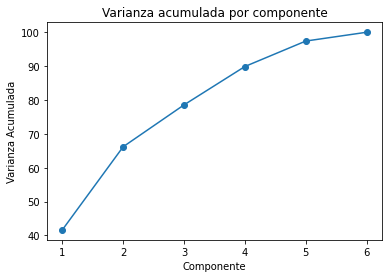

In [11]:
plt.plot(var['Componente'], var['Acumulado'], marker='o')
plt.xlabel('Componente')
plt.ylabel('Varianza Acumulada')
plt.title('Varianza acumulada por componente')
plt.show()

Para los anteriores, la varianza nos explica cuanto esta aportando de información la componente calculada. Por otro lado, la varianza acumulada es la suma de las varianzas, es aquí donde podemos escoger cuantos componentes son aptos para nuestro estudio, ya que nos indica cuanta información se está representado y cuanta información perdemos. 
El objetivo de un PCA, es la reducción de la dimensionalidad, debemos de seleccionar los componentes principales. Existen diversos métodos de selección, se conoce que, a partir de la información sacada de la varianza acumulada, es bueno escoger las componentes que explican almenos, el 80%. 

¿Cuánta información perdemos con 2 componentes? ¿Cuánta información representamos con 3 componentes? 

In [12]:
perdida = 100 - var.iloc[1]['Acumulado']
info = var.iloc[2]['Acumulado']

print(f"La cantidad de información perdida con 2 componentes es: {perdida:.2f}%")
print(f"La cantidad de información representada con 3 componentes es: {info:.2f}%")

La cantidad de información perdida con 2 componentes es: 33.81%
La cantidad de información representada con 3 componentes es: 78.56%


Como hemos dicho anteriormente, es bueno escoger componentes que expliquen almenos el 80%. Coger solo dos componentes no nos parece una buena elección ya que creemos que almenos deberíamos escoger almenos 3 componentes, y estos no llegan al 80%. Hemos realizado el gráfico para verlo de una manera más fácil, una forma óptima de escoger los componentes principales, sería escoger cuando el error no sea tan pronunciado. 

## Apartado 3

Queremos representar gráficamente los individuos de nuestro dataset, pero usando los 
valores  de  las  componentes  principales  obtenidas.

In [13]:
pip install tabulate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Vamos a realizar la correlación que tienen los dos primeros componentes con las variables originales.

In [14]:
from tabulate import tabulate

autoval1 =autoval[[0,1]]
autovect1= autovect[:,[0,1]]
new=[]
for i in range (len(autoval)):
  for k in range(len(autoval1)):
    her=autovect1[i,k]
    tk=autoval[k]
    bru=cov[i,i]
    neww=her*np.sqrt(tk)/np.sqrt(bru)
    new.append(neww)
print("Correlacion entre las variables: ", '\n','\n',
 tabulate(np.array(new).reshape(len(autoval), len(autoval1)), ["Componente 1","Componente 2"], showindex=['PS', 'Ataque', 'Defensa', 'Ataque especial', 'Defensa especial', 'Velocidad']))
     


Correlacion entre las variables:  
 
                     Componente 1    Componente 2
----------------  --------------  --------------
PS                      0.718474        0.192343
Ataque                  0.712448       -0.305835
Defensa                 0.503951       -0.767083
Ataque especial         0.669119        0.463983
Defensa especial        0.760279       -0.204539
Velocidad               0.441568        0.705028


Esto nos indica diferentes cosas. Vemos que la primera componente influye mucho en las variables: PS, Ataque especial, Defensa especial y Ataque. La segunda variable influye mucho en velocidad y en defensa, de forma inversamente proporcional. 

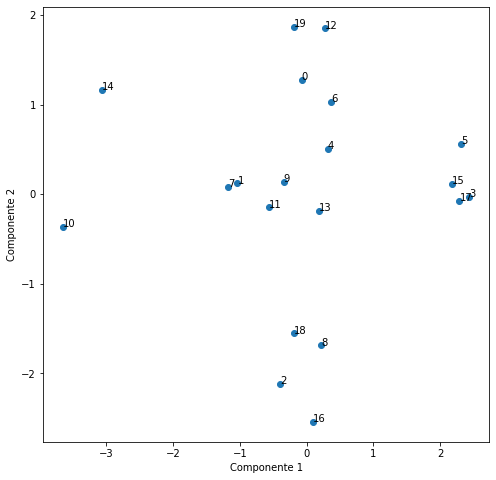

In [15]:
columnas = data[['PS', 'Ataque', 'Defensa', 'Ataque especial', 'Defensa especial', 'Velocidad']]
x = (columnas - columnas.mean()) / columnas.std()

#Análisis de los componentes que quiero
ind  = np.argsort(autoval)[::-1]
autovals = autoval[ind]
autovects = autovect[:, ind]
transform_matrix = autovects[:, :2]
x_pca = np.dot(x, transform_matrix) 

#Grafico
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(x_pca[:, 0], x_pca[:, 1])
ax.set_xlabel("Componente 1")
ax.set_ylabel("Componente 2")

#Números a los individuos
for i, row in data.iterrows():
    ax.annotate(str(i), (x_pca[i, 0], x_pca[i, 1]))

plt.show()


El gráfico anterior nos representa por un lado la primera componente, en el eje x y el eje y, la segunda componente. Estos representan las dos combinaciones lineales de las variables originales, y estas la mayor varianza. Dado el gráfico de correlación de las dos componentes principales, debemos de seleccionar a 4 individuos. 
Se ha seleccionado los individuos 5, 15, 17 y 3. 
Vamos a recuperar los datos de estos individuos.

In [59]:
import pandas as pd
data = pd.read_csv('pokemon.csv', encoding = 'latin_1')
data.head()

,PokÃ©mon,Tipo,PS,Ataque,Defensa,Ataque especial,Defensa especial,Velocidad
0,TYPHLOSION,Fuego,2,3,2,4,2,4
1,PONYTA,Fuego,2,3,2,2,2,3
2,TORKOAL,Fuego,2,3,4,3,2,1
3,ARCANINE,Fuego,3,5,3,4,3,4
4,STARMIE,Agua,2,3,3,4,2,4


In [60]:
desc = data.describe()
desc


,PS,Ataque,Defensa,Ataque especial,Defensa especial,Velocidad
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,2.250000,2.950000,2.600000,3.350000,2.400000,2.850000
std,0.786398,0.944513,0.820783,1.182103,0.820783,1.136708
min,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,2.000000,3.000000,2.500000,3.500000,2.000000,3.000000
75%,3.000000,3.250000,3.000000,4.000000,3.000000,4.000000
max,4.000000,5.000000,4.000000,5.000000,4.000000,5.000000


Con esta función podemos observar un poco mejor el análisis de los datos númericos, para realizar comparaciones. 

In [61]:
data = data.iloc[[5, 15, 17, 3], :]
data

,PokÃ©mon,Tipo,PS,Ataque,Defensa,Ataque especial,Defensa especial,Velocidad
5,PALKIA,Agua,3,4,3,5,3,4
15,AMPHAROS,ElÃ©ctrico,3,3,3,5,4,3
17,JIRATINA,Fantasma,4,4,3,4,3,3
3,ARCANINE,Fuego,3,5,3,4,3,4


Anteriormente hemos dicho que los componentes influyen más o menos, en algunos de las variables. Vamos a comprobar nuestra hipostesis corroborando con los datos que nos han proporcionado al principio. Sobre la primera componente, las variables que más afectan a ella eran: PS, Ataque especial, Defensa especial y Ataque. 


*   Ataque: Nuestros individuos escogidos pasan la media del ataque, la media queda casi en 3, y todos ellos la superan, hasta obteniendo un máximo. 
*   Defensa especial: Todos nuestros individuos también superan con creces la media, uno de ellos llega al máximo.
*   Ataque especial: Vuelven a sobrepasar la media, y obtenemos dos máximos en este caso. 
*   PS: Pasamos la media y llegamos a obtener un máximo. 

Ahora vamos a ver las variables que influyen en la segunda componente:



*   Velocidad: En este caso, no llegamos a ningún máximo, pero pasamos la media. 
*  Defensa: Tampoco llegamos a obtener un máximo, pero como en todas las variables superamos la media. 

Por tanto vemos que el análisis y la selección de estos elementos ha sido aceptada. 







## Apartado 3

Vamos a realizar los mismos pasos que en los pasos anteriores usando la librería scikit-learn. 

In [62]:
from sklearn.decomposition import PCA

In [63]:
import pandas as pd
data = pd.read_csv('pokemon.csv', encoding = 'latin_1')
data.head()

,PokÃ©mon,Tipo,PS,Ataque,Defensa,Ataque especial,Defensa especial,Velocidad
0,TYPHLOSION,Fuego,2,3,2,4,2,4
1,PONYTA,Fuego,2,3,2,2,2,3
2,TORKOAL,Fuego,2,3,4,3,2,1
3,ARCANINE,Fuego,3,5,3,4,3,4
4,STARMIE,Agua,2,3,3,4,2,4


Realizamos la estandarización de los datos. Esta vez vamos a estandarizarlos de una manera diferente, haciendo lo que es la estandarización, utilizando la media y la desviación. 

In [64]:
columnas = data[['PS', 'Ataque', 'Defensa', 'Ataque especial', 'Defensa especial', 'Velocidad']]
col = (columnas - columnas.mean()) / columnas.std()
col

,PS,Ataque,Defensa,Ataque especial,Defensa especial,Velocidad
0,-0.317905,0.052937,-0.731010,0.549867,-0.487340,1.011693
1,-0.317905,0.052937,-0.731010,-1.142032,-0.487340,0.131960
2,-0.317905,0.052937,1.705689,-0.296082,-0.487340,-1.627507
3,0.953716,2.170430,0.487340,0.549867,0.731010,1.011693
4,-0.317905,0.052937,0.487340,0.549867,-0.487340,1.011693
5,0.953716,1.111684,0.487340,1.395817,0.731010,1.011693
6,0.953716,-1.005809,-0.731010,0.549867,0.731010,0.131960
7,0.953716,-1.005809,-0.731010,-1.142032,-0.487340,-0.747773
8,-0.317905,1.111684,1.705689,-1.142032,-0.487340,0.131960
9,0.953716,0.052937,-0.731010,-0.296082,-0.487340,-0.747773


Vamos a ver que cada componente del PCA, en total 6 componentes, y la varianza de estos, es decir, el total de información que estos nos describen. 

In [65]:
pca = PCA()
pca.fit(col)

varianza = pca.explained_variance_ratio_
varianza

array([0.41641341, 0.2455214 , 0.12363041, 0.1132909 , 0.07514464,
       0.02599924])

Observamos que la suma de estas da 1. Vemos que con 3 componentes la suma llega casi al 80% de la varianza. 


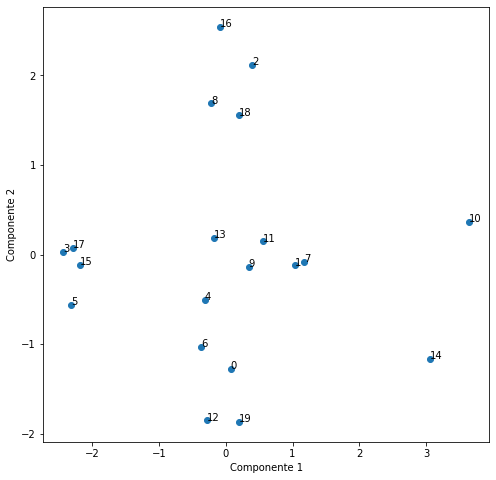

In [66]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(col)

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X_pca[:, 0], X_pca[:, 1])
ax.set_xlabel("Componente 1")
ax.set_ylabel("Componente 2")

for i, row in data.iterrows():
    ax.annotate(str(i), (X_pca[i, 0], X_pca[i, 1]))

plt.show()

Observamos que nos sale el gráfico completamente invertido. Si observamos en individuo 10, que enteoría es el individuo mejor representado vemos que esto no es así. 

In [67]:
data2 = data.iloc[[10], :]
data2

,PokÃ©mon,Tipo,PS,Ataque,Defensa,Ataque especial,Defensa especial,Velocidad
10,CHERUBI,Planta,1,1,2,2,1,1


En cambio si relizamos la misma comparación que el apartado anterior, con los números que nos salen a la izquierda del gráfico vemos que sale igual.

In [68]:
data = data.iloc[[5, 15, 17, 3], :]
data

,PokÃ©mon,Tipo,PS,Ataque,Defensa,Ataque especial,Defensa especial,Velocidad
5,PALKIA,Agua,3,4,3,5,3,4
15,AMPHAROS,ElÃ©ctrico,3,3,3,5,4,3
17,JIRATINA,Fantasma,4,4,3,4,3,3
3,ARCANINE,Fuego,3,5,3,4,3,4


Por tanto podemos concluir que no observamos ningún cambio respecto a la otra manera de realizarlo. Seguimos con los 4 individuos, que a nuestro parecer son los mejores. 